In [1]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib widget
from skimage.io import imread, imsave
import numpy as np

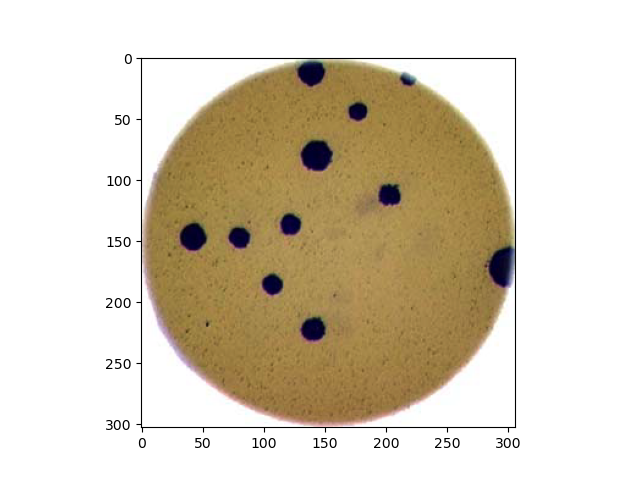

In [2]:
colony = imread('data/colonies-01.tif')
plt.subplots()
plt.imshow(colony)

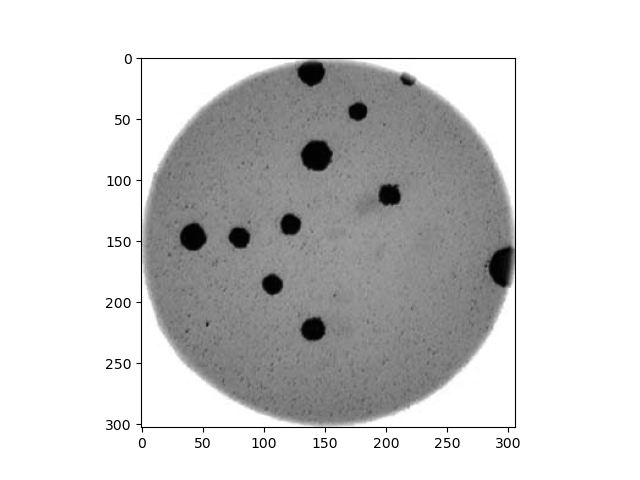

In [4]:
colony_gray = skimage.color.rgb2gray(colony)
plt.subplots()
plt.imshow(colony_gray,cmap='gray')

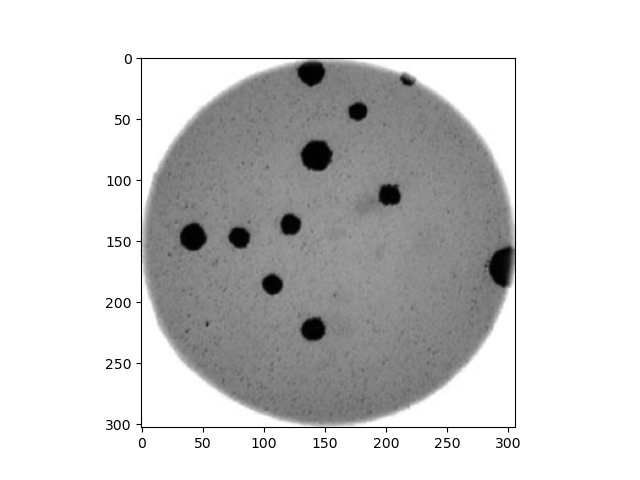

In [21]:
blurred_image = skimage.filters.gaussian(colony_gray,sigma=0.5)
plt.subplots()
plt.imshow(blurred_image,cmap='gray')

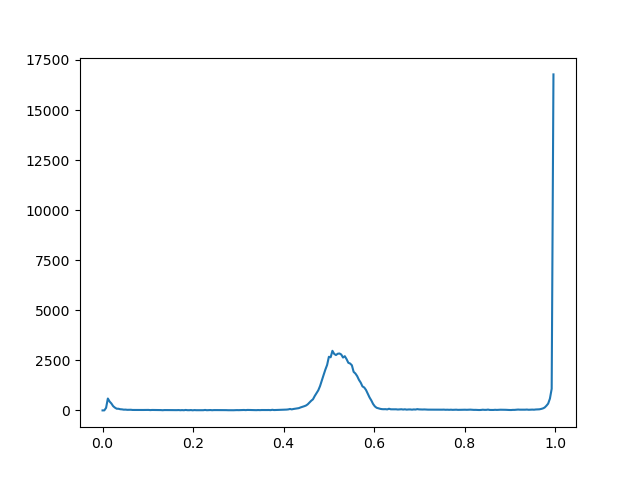

In [22]:
histogram,bin_edges = np.histogram(blurred_image,bins=256,range=(0,1))
plt.subplots()
plt.plot(bin_edges[0:-1],histogram)

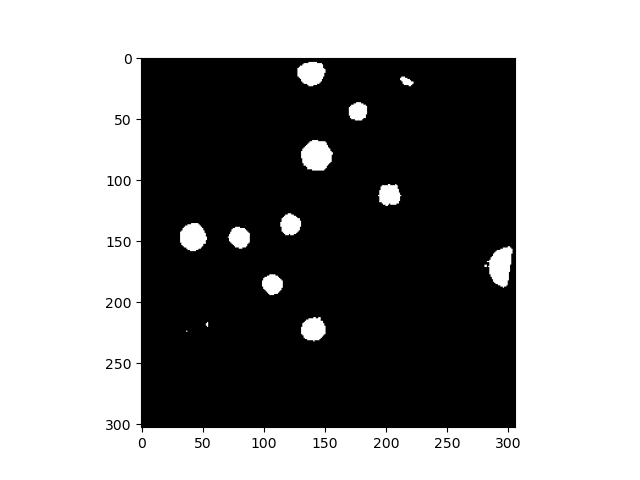

In [23]:
th = skimage.filters.threshold_multiotsu(blurred_image)
binary_mask = (blurred_image<th[0]) 
plt.subplots()
plt.imshow(binary_mask,cmap='gray')

In [24]:
labeled_image, count = skimage.measure.label(binary_mask,
                                                 connectivity=2, return_num=True)
print(count)                                                 

14


In [25]:
object_features = skimage.measure.regionprops(labeled_image)
object_areas = [objf["area"] for objf in object_features]
object_areas

[348, 52, 184, 499, 254, 233, 384, 238, 468, 4, 219, 305, 6, 1]

In [37]:
def enhanced_connected_components(filename, sigma=2.0, connectivity=2, min_area=0):
    image = skimage.io.imread(filename)
    gray_image = skimage.color.rgb2gray(image)
    blurred_image = skimage.filters.gaussian(gray_image, sigma=sigma)
    th = skimage.filters.threshold_multiotsu(blurred_image)
    binary_mask = (blurred_image<th[0]) 
    # plt.subplots()
    # plt.imshow(binary_mask,cmap='gray')
    object_mask = skimage.morphology.remove_small_objects(binary_mask,min_area)
    labeled_image, count = skimage.measure.label(object_mask,
                                                 connectivity=connectivity, return_num=True)
    return labeled_image, count

Found 11 objects in the image.


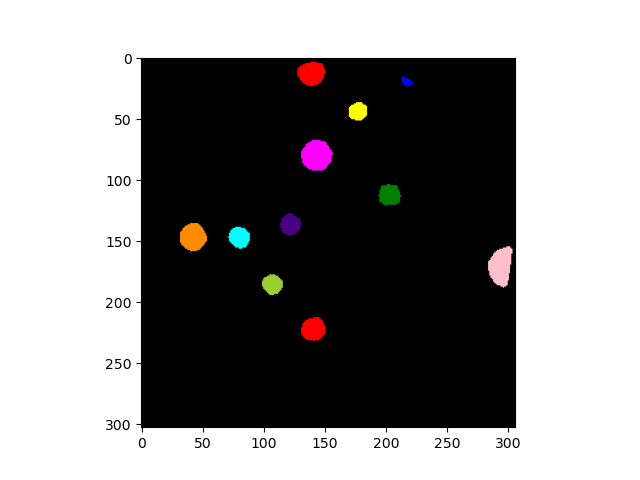

In [51]:
sigma = 1
connectivity = 2
min_area = 10
labeled_image, count = enhanced_connected_components(filename="data/colonies-01.tif", sigma=sigma, 
                                                     connectivity=connectivity, min_area=min_area)
colored_label_image = skimage.color.label2rgb(labeled_image, bg_label=0)
print("Found", count, "objects in the image.")
fig, ax = plt.subplots()
plt.imshow(colored_label_image)


Found 66 objects in the image.


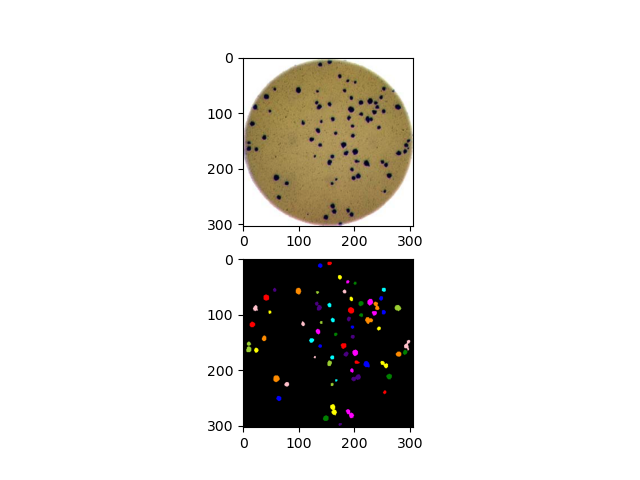

In [52]:
image_path = 'data/colonies-02.tif'
labeled_image, count = enhanced_connected_components(filename=image_path, sigma=sigma, 
                                                     connectivity=1, min_area=min_area)
colored_label_image = skimage.color.label2rgb(labeled_image, bg_label=0)
print("Found", count, "objects in the image.")
fig, ax = plt.subplots(2)
image = imread(image_path)
ax[0].imshow(image)
ax[1].imshow(colored_label_image)

Found 266 objects in the image.


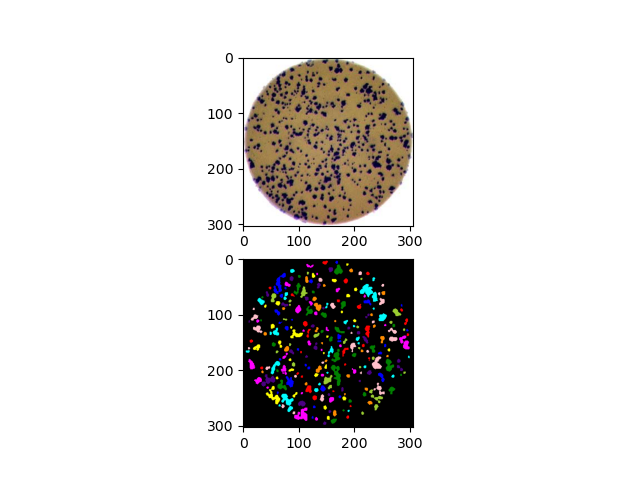

In [53]:
image_path = 'data/colonies-03.tif'
labeled_image, count = enhanced_connected_components(filename=image_path, sigma=sigma, 
                                                     connectivity=connectivity, min_area=min_area)
colored_label_image = skimage.color.label2rgb(labeled_image, bg_label=0)
print("Found", count, "objects in the image.")
fig, ax = plt.subplots(2)
image = imread(image_path)
ax[0].imshow(image)
ax[1].imshow(colored_label_image)